# Live Coding 11
## Some  exploratory data analysis using titanic dataset


In [ ]:
# Getting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Getting the data
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head() # to look first 5 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info() # to get information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic[['age','fare','survived']].describe() # I choosed only three of them to see age and fare versus survived 

,age,fare,survived
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838
std,14.526497,49.693429,0.486592
min,0.420000,0.000000,0.000000
25%,20.125000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,38.000000,31.000000,1.000000
max,80.000000,512.329200,1.000000


#TASK-11A
## Please provide a pivot table with respect to embarked port and survived rate.

### Then provide three different tables with respect to:

- gender
- age (you can divide this column into further parts)
- class (1, 2, 3) **

In [ ]:
titanic.pclass.unique() # to see unique number of classes

array([3, 1, 2])

In [ ]:
titanic.embark_town.unique() #  to see unique number of embark towns

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [ ]:
titanic.embarked.unique()  # to see unique number of embark towns

array(['S', 'C', 'Q', nan], dtype=object)

# Survived rate used index as embarked town. As columns sex, class and age used.
* mean
* sum
* Below I created some pivot tables using different columns to see effects of the different variables.

In [ ]:
titanic.pivot_table('survived', index='embarked', aggfunc=['mean']) # variation of survival rates by town

,mean
,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
# I dropped the mean sign above
titanic.pivot_table('survived', index='embarked', aggfunc='mean')

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
titanic.pivot_table('survived', index='embark_town', aggfunc=['sum']) # now we can look at the different towns via survived sum

,sum
,survived
embark_town,
Cherbourg,93
Queenstown,30
Southampton,217


In [ ]:
titanic.pivot_table('survived', index='embark_town', columns='sex', aggfunc=['sum']) # to see the difference between man and woman.

sum     
sex         female male
embark_town            
Cherbourg       64   29
Queenstown      27    3
Southampton    140   77

In [ ]:
titanic.pivot_table('survived', index='embark_town', columns='sex', aggfunc=['mean']) # now breakdowns according to sex and town.

mean          
sex            female      male
embark_town                    
Cherbourg    0.876712  0.305263
Queenstown   0.750000  0.073171
Southampton  0.689655  0.174603

In [ ]:
titanic.pivot_table('survived', index='embark_town', columns='class', aggfunc=['sum']) # same process but this with sum 

sum             
class       First Second Third
embark_town                   
Cherbourg      59      9    25
Queenstown      1      2    27
Southampton    74     76    67

In [ ]:
titanic.pivot_table('survived', index='embark_town', columns='class', aggfunc=['mean']) # the effect of class differences in titanic data on survival rates 

mean                    
class           First    Second     Third
embark_town                              
Cherbourg    0.694118  0.529412  0.378788
Queenstown   0.500000  0.666667  0.375000
Southampton  0.582677  0.463415  0.189802

In [ ]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
age = pd.cut(titanic['age'], [0, 20,40,60,80])
age

0      (20.0, 40.0]
1      (20.0, 40.0]
2      (20.0, 40.0]
3      (20.0, 40.0]
4      (20.0, 40.0]
           ...     
886    (20.0, 40.0]
887     (0.0, 20.0]
888             NaN
889    (20.0, 40.0]
890    (20.0, 40.0]
Name: age, Length: 891, dtype: category
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80]]

In [ ]:
titanic.pivot_table('survived', index='embark_town', columns=age, aggfunc=['mean']) # age and town breakdowns

mean                             
age          (0, 20]  (20, 40]  (40, 60] (60, 80]
embark_town                                      
Cherbourg    0.71875  0.567164  0.642857     0.00
Queenstown   0.40000  0.307692  0.000000     0.00
Southampton  0.40146  0.361842  0.329897     0.25

In [ ]:
titanic.pivot_table('survived', index='embark_town', columns=[age], aggfunc=['sum'])

sum                           
age         (0, 20] (20, 40] (40, 60] (60, 80]
embark_town                                   
Cherbourg        23       38       18        0
Queenstown        4        4        0        0
Southampton      55      110       32        4

In [ ]:
ages = pd.cut(titanic['age'], [0,40,80])
ages

0      (0.0, 40.0]
1      (0.0, 40.0]
2      (0.0, 40.0]
3      (0.0, 40.0]
4      (0.0, 40.0]
          ...     
886    (0.0, 40.0]
887    (0.0, 40.0]
888            NaN
889    (0.0, 40.0]
890    (0.0, 40.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 40] < (40, 80]]

In [ ]:
titanic.pivot_table('survived', index='embark_town', columns=[ages,'sex'], aggfunc=['sum'])

sum                     
age         (0, 40]       (40, 80]      
sex          female  male   female  male
embark_town                             
Cherbourg      42.0  19.0     13.0   5.0
Queenstown      7.0   1.0      NaN   0.0
Southampton   110.0  55.0     23.0  13.0

# TASK-11B
## Please provide visual illustrations for the pivot tables that you have formed.

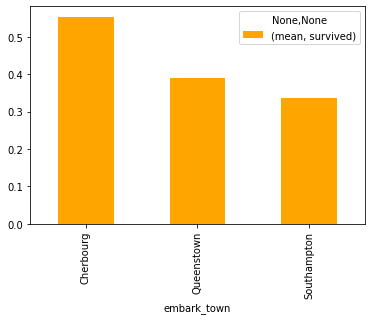

In [ ]:
titanic.pivot_table('survived', index='embark_town', aggfunc=['mean']).plot(kind='bar',color='orange')

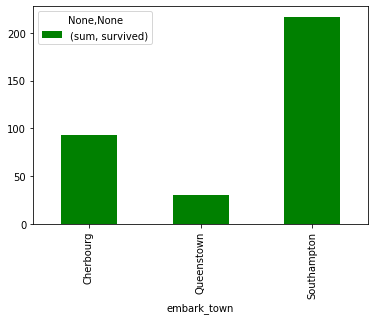

In [ ]:
titanic.pivot_table('survived', index='embark_town', aggfunc=['sum']).plot(kind='bar',color='green')

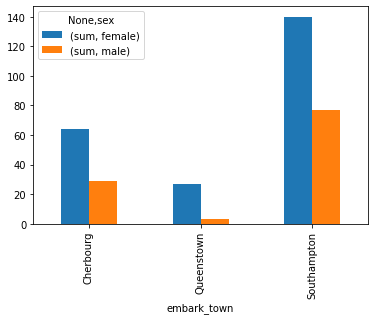

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns='sex', aggfunc=['sum']).plot(kind='bar')

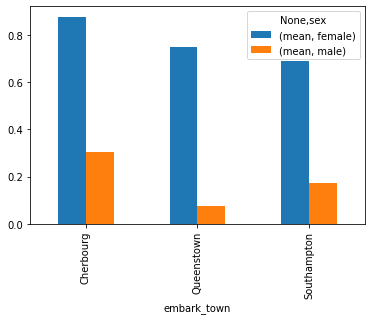

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns='sex', aggfunc=['mean']).plot(kind='bar')

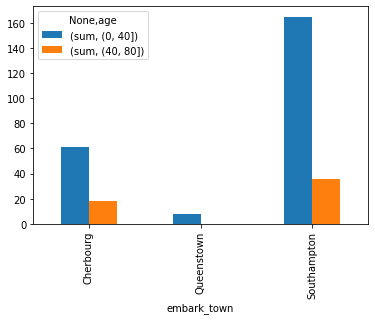

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns=ages, aggfunc=['sum']).plot(kind='bar')

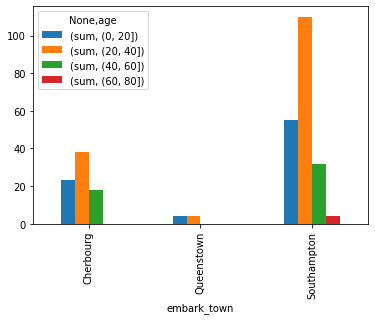

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns=age, aggfunc=['sum']).plot(kind='bar')

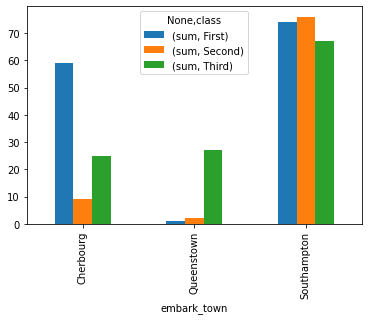

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns='class', aggfunc=['sum']).plot(kind='bar')

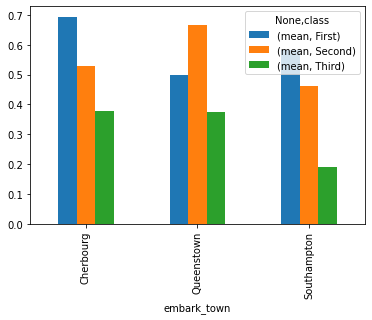

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns='class', aggfunc=['mean']).plot(kind='bar')

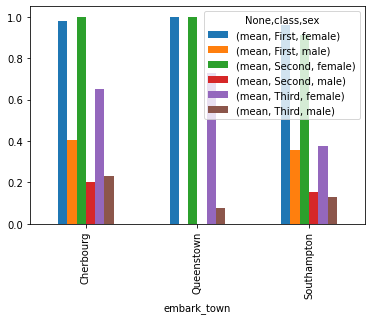

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns=['class','sex'], aggfunc=['mean']).plot(kind='bar')

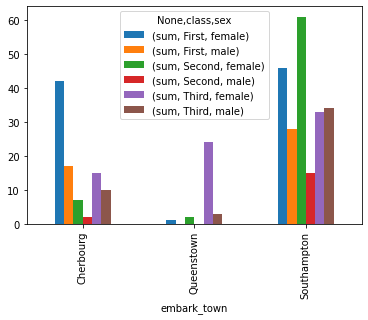

In [ ]:
titanic.pivot_table('survived', index='embark_town',columns=['class','sex'], aggfunc=['sum']).plot(kind='bar')

#TASK-11C
## Please elaborate on the insights you can drive out of these tables and figures. Just 4-5 sentences might be enough for expressing the overall outputs.

* Cherbourg town with the highest average survivors by town breakdown

*  When we add the gender breakdown in addition to the town breakdowns, the town with the highest average survivorship is cherburg

* Women have higher survival rates than men in all towns

* According to the classes in the towns, the survival rate from first to third class decreased in two towns, while the second grade survival rate was highest in Quenstown.

* When looking at age breakdowns, survival between 0-40 is much higher than between 40-80.

In [ ]:
female = titanic[titanic['sex']=='female']
len(female[(female['age']>15) & (female['age']<55)])

208

In [ ]:
male = titanic[titanic['sex']=='male']
len(male[(male['age']>15) & (male['age']<55)])

381

# TASK-11E
## Please provide the number of survived passengers that paid higher than 100 for the fare.

In [ ]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
len(titanic[(titanic['survived']==1) & (titanic['fare']>100)])

39

In [ ]:
titanic[(titanic['survived']==1) & (titanic['fare']>100)].shape[0]

39

# TASK-11F
## Please also do the D and E tasks by the use of query function.

In [ ]:
female = titanic[titanic['sex']=='female']
len(female.query('age>15 and  age<55'))

208

In [ ]:
survived = titanic[titanic['survived']==1]
len(survived.query('fare>100'))

39